In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [59]:
sns.set(style="whitegrid")

In [60]:
df= pd.read_csv('AIML Dataset.csv')

In [61]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [63]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [64]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.shape

(6362620, 11)

In [67]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [68]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [69]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Text(0, 0.5, 'Count')

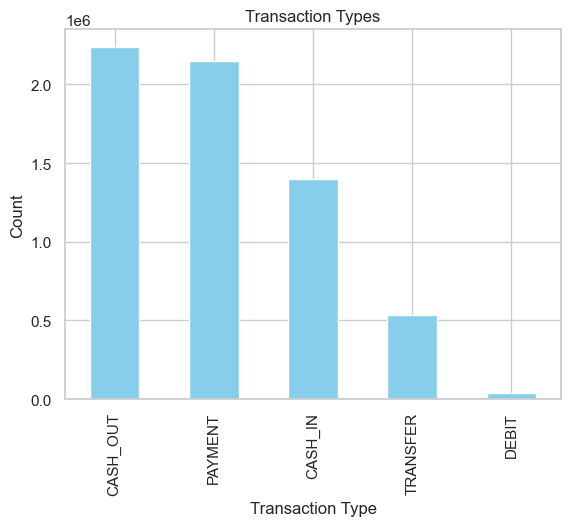

In [70]:
df['type'].value_counts().plot(kind="bar",title="Transaction Types",color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

In [71]:
fraud_by_type= df.groupby("type")["isFraud"].mean().sort_values(ascending=False)

Text(0, 0.5, 'fraud_by_type')

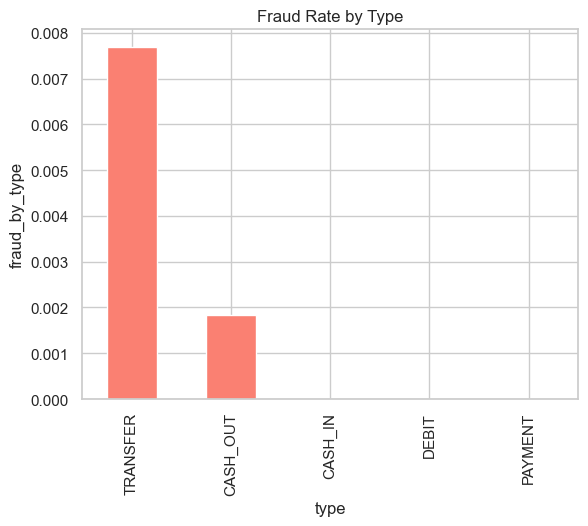

In [72]:
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="salmon")
plt.ylabel("fraud_by_type")

In [73]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

Text(0.5, 1.0, 'transaction amount distribution (log scale)')

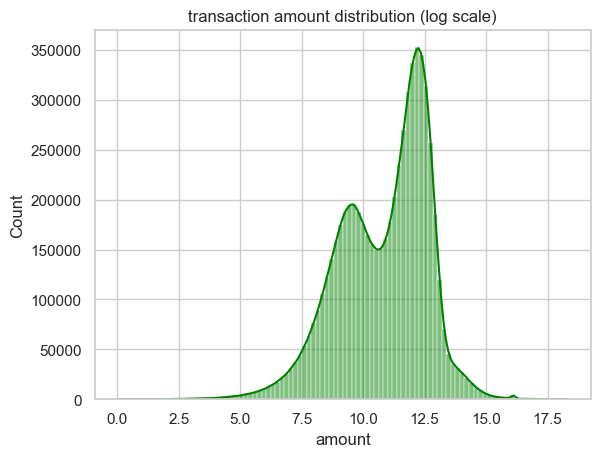

In [74]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="green")
plt.title("transaction amount distribution (log scale)")


Text(0.5, 1.0, 'Amount vs isFraud (Filtered under 50k)')

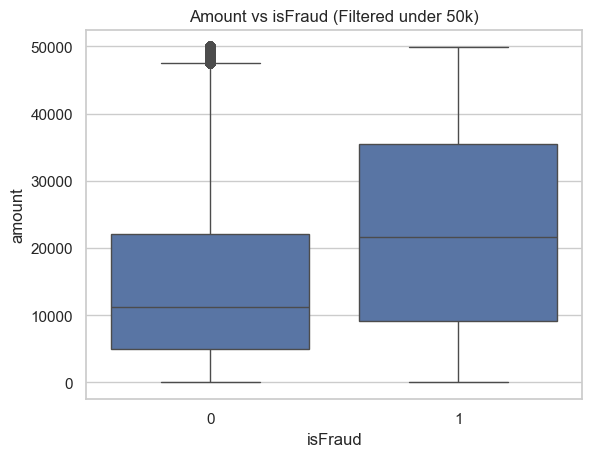

In [75]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")

In [76]:
df["balanceDiffOrig"]= df["oldbalanceOrg"]- df["newbalanceOrig"]
df["balancedDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [77]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [78]:
 (df["balancedDiffDest"] < 0).sum()

np.int64(1238864)

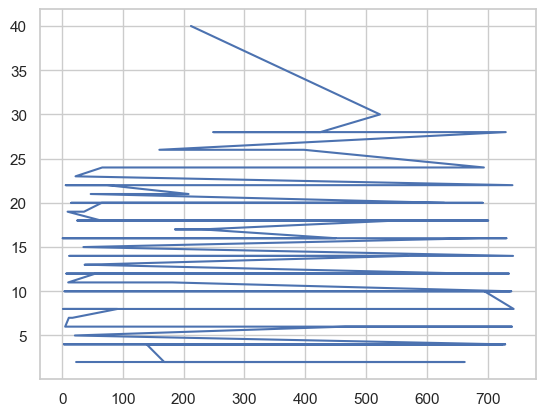

In [79]:
frauds_per_Step= df[df["isFraud"] ==1]["step"].value_counts()
plt.plot(frauds_per_Step.index,frauds_per_Step.values, label= "Frauds per steps")

In [80]:
df.drop(columns= "step", inplace=True)

In [81]:
top_senders= df["nameOrig"].value_counts().head(10)

In [82]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [83]:
top_recievers = df["nameDest"].value_counts().head(10)

In [84]:
top_recievers 

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [85]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [86]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
Name: count, dtype: int64

In [90]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]


In [91]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

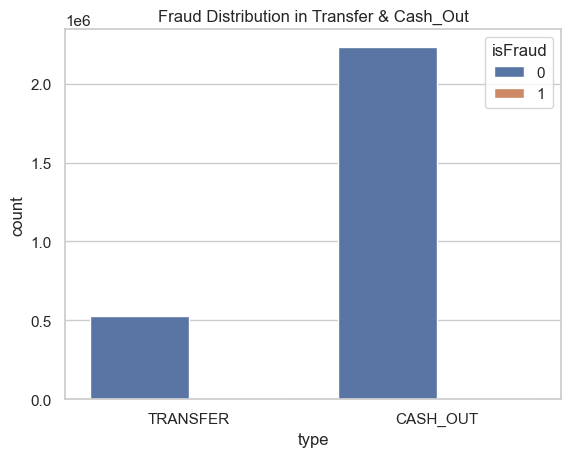

In [95]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()


In [98]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()


<Axes: >

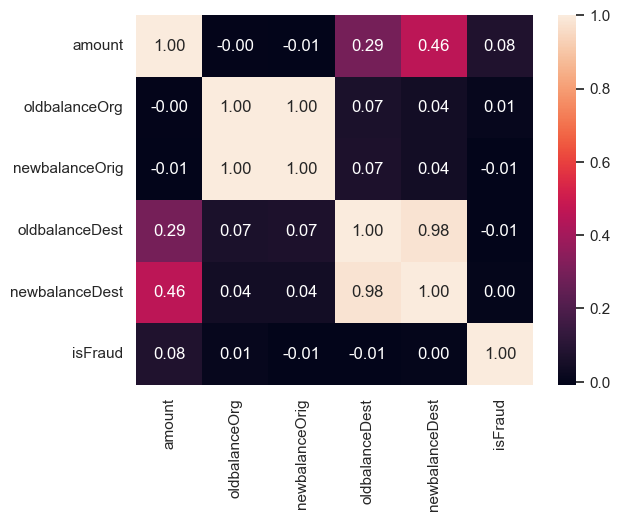

In [99]:
sns.heatmap(corr,annot=True,fmt=".2f")

In [101]:
zero_after_transfer = df[
(df["oldbalanceOrg"] > 0) &
(df["newbalanceOrig"]==0) &
(df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [102]:
len(zero_after_transfer)

1188074

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   type              object 
 1   amount            float64
 2   nameOrig          object 
 3   oldbalanceOrg     float64
 4   newbalanceOrig    float64
 5   nameDest          object 
 6   oldbalanceDest    float64
 7   newbalanceDest    float64
 8   isFraud           int64  
 9   isFlaggedFraud    int64  
 10  balanceDiffOrig   float64
 11  balancedDiffDest  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 582.5+ MB


In [108]:
df_model = df.drop(["nameOrig","isFlaggedFraud","nameDest"], axis=1)

In [111]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   type              object 
 1   amount            float64
 2   oldbalanceOrg     float64
 3   newbalanceOrig    float64
 4   oldbalanceDest    float64
 5   newbalanceDest    float64
 6   isFraud           int64  
 7   balanceDiffOrig   float64
 8   balancedDiffDest  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 436.9+ MB


In [109]:
categorical = ["type"]
numeric= ["amount","oldbalanceOrg","oldbalanceDest","newbalanceDest"]

In [112]:
X = df_model.drop("isFraud", axis=1)   # all features
y = df_model["isFraud"]                # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify for class balance
)

In [114]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num",StandardScaler(), numeric),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder= "drop"
)
preprocessor 

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['amount', 'oldbalanceOrg', 'oldbalanceDest',
                                  'newbalanceDest']),
                                ('cat', OneHotEncoder(drop='first'), ['type'])])

In [116]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
    
])

In [117]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [118]:
y_pred= pipeline.predict(X_test)

In [124]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1270881
           1       0.02      0.92      0.03      1643

    accuracy                           0.93   1272524
   macro avg       0.51      0.93      0.50   1272524
weighted avg       1.00      0.93      0.96   1272524



In [126]:
confusion_matrix(y_test,y_pred)

array([[1182118,   88763],
       [    127,    1516]])

In [127]:
pipeline.score(X_test,y_test)

0.9301467005730344

In [ ]:
import joblib
joblib.dump(pipeline,"fraud_dete")